In [0]:
%python
import urllib
urllib.urlretrieve("https://s3-ap-southeast-2.amazonaws.com/variant-spark/datasets/hipsterIndex/hipster.vcf", "/tmp/hipster.vcf")
urllib.urlretrieve("https://s3-ap-southeast-2.amazonaws.com/variant-spark/datasets/hipsterIndex/hipster_labels.txt", "/tmp/hipster_labels.txt")
dbutils.fs.mv("file:/tmp/hipster.vcf", "dbfs:/vs-datasets/hipsterIndex/hipster.vcf")
dbutils.fs.mv("file:/tmp/hipster_labels.txt", "dbfs:/vs-datasets/hipsterIndex/hipster_labels.txt")
display(dbutils.fs.ls("dbfs:/vs-datasets/hipsterIndex"))

path,name,size
dbfs:/vs-datasets/hipsterIndex/hail_pvals.csv,hail_pvals.csv,342217
dbfs:/vs-datasets/hipsterIndex/hipster.vcf,hipster.vcf,173024889
dbfs:/vs-datasets/hipsterIndex/hipster.vcf.bz2,hipster.vcf.bz2,1448482
dbfs:/vs-datasets/hipsterIndex/hipster_labels.txt,hipster_labels.txt,33550


In [0]:
%scala
import au.csiro.variantspark.api.VSContext
import au.csiro.variantspark.api.ImportanceAnalysis
implicit val vsContext = VSContext(spark)

val featureSource = vsContext.featureSource("/vs-datasets/hipsterIndex/hipster.vcf")
val labelSource  = vsContext.labelSource("/vs-datasets/hipsterIndex/hipster_labels.txt", "label")
val importanceAnalysis = ImportanceAnalysis(featureSource, labelSource, nTrees = 1000)
val variableImportance = importanceAnalysis.variableImportance
variableImportance.cache().registerTempTable("importance")
display(variableImportance)

variable,importance
2_109511398,2.3852234454569356E-8
2_109511454,5.4988937952915176E-8
2_109511463,1.010868100015645E-6
2_109511467,3.1213006514980444E-6
2_109511478,0.0
2_109511497,3.026500026484611E-8
2_109511525,1.743433132175347E-7
2_109511527,0.0
2_109511532,0.0
2_109511579,0.0


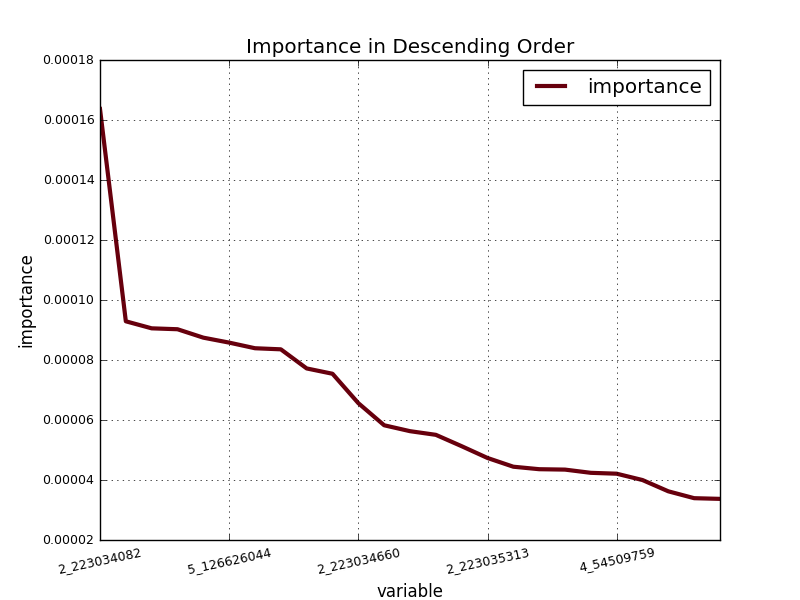

In [0]:
%python
import matplotlib.pyplot as plt
importance = sqlContext.sql("select * from importance order by importance desc limit 25")
importanceDF = importance.toPandas()
ax = importanceDF.plot(x="variable", y="importance",lw=3,colormap='Reds_r',title='Importance in Descending Order', fontsize=9)
ax.set_xlabel("variable")
ax.set_ylabel("importance")
plt.xticks(rotation=12)
plt.grid(True)
plt.show()
display()

###Credit

CSIRO Transformational Bioinformatics team has developed VariantSpark and put together this illustrative example. Thank you to Lynn Langit for input on the presentation of this notebook.